# Final Group Project: Part 4
Emerson

**Instructions**
- How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model?
- Add a single 2ft outlier to the histogram of data and **replot it** as part of your Jupyter notebook.

**Grading Criteria**
- Did Part 4 clearly articulate how big the Tsunami deviation is in relation to the typical tidal pattern?
- Did the answer consider the standard deviations of the distribution of normal tides from the model?

In [1]:
# import libraries as alias
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

# import the data
tidedata = "C:/Users/skyyl/Desktop/astr19/group-project/ASTR19_F23_group_project_data.txt"
filein = open(tidedata,"r")
content = filein.readlines()

y = []
x = []
# create a loop that will read every line of the data
#and then put it into a list so that I can actually
# refer to the third columun and add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

# ----------------------------- DELETE WHEN COMPILING ----------------------------- #

#### Standard Deviation for the Tsunami Outlier

In [2]:
# take the mean of tide heightsp
mean = np.mean(y)                      # take the mean of the tidal heights (y)
s = np.std(y)                          # take the standard deviation in tide heights (y)
#
# define the outlier for January 14
tsunami = 2.0                          # increase in high tide by ~2ft
y[26] = y[26] + tsunami
outlier = y[26]        

print(f"\nOutlier: \nTsunami high tide on January 14th = {outlier}\n")


Outlier: 
Tsunami high tide on January 14th = 7.33



In [3]:
# find SD of the outlier

def deviations(outlier,mean,s):
    # deviations: the number of standard deviations (s) that the observed outlier (outlier) is from the typical tidal pattern / mean
    d = ((outlier - mean) / s)
    return d

d = deviations(outlier,mean,s)
print(f'\nThe January 14 tsunami deviates from the model\'s mean tidal height by {d:5.4} standard deviations.\n')


The January 14 tsunami deviates from the model's mean tidal height by 2.038 standard deviations.



In [4]:
# Outlier detection using Z-score
z_scores = np.abs((y - np.mean(y)) / np.std(y))
outliers = np.array(y)[z_scores > 1.9]  # Adjusted threshold to single out the outlier

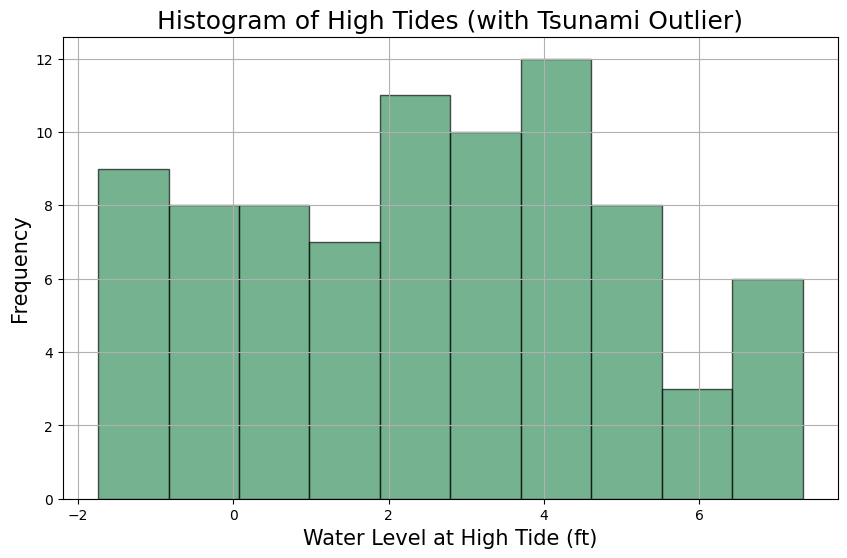


Additional Statistical Measures: 
Detected Outliers: [7.33]



In [5]:
# Replot the histogram with the outlier and additional information
plt.figure(figsize=(10, 6))
plt.hist(y, bins=10, color='seagreen', alpha=0.66, edgecolor='black')
plt.xlabel('Water Level at High Tide (ft)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of High Tides (with Tsunami Outlier)', fontsize=18)
plt.grid(True)
plt.show()

print(f"\nAdditional Statistical Measures: \nDetected Outliers: {outliers}\n")